In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
from tqdm import tqdm
from scipy.io import loadmat
# Configuration
Ks = range(6,13)
alphas = [500, 750, 1000, 1250, 1500]
preproc_filepath = ('/users/konstantinosvosinas/Desktop/PREP2025/vals_preproc.mat')
denoised_filepath = ('/users/konstantinosvosinas/Desktop/PREP2025/data/vals_denoised.csv')
def preprocess_data(filepath):
    data = loadmat(filepath)
    scan_names = [i[0][0] for i in data['vals'][0][0][0]]
    subjects = [f.split('_')[0] for f in scan_names]
    sample_rate = [2 if f.split('_')[1][4] == 'p' else 0.8 for f in scan_names]
    run_nos = [int(f.split('_')[2][4]) for f in scan_names]
    scans = [i[0] for i in data['vals'][0][0][1]]
    points = [len(i[0]) for i in data['vals'][0][0][1]]
    df = pd.DataFrame({'filename': scan_names, 'subject': subjects, 'run':run_nos, 'sample_rate':sample_rate, 'timepoints': points, 'scans': scans}).sort_values(by=['filename'], inplace=False)
    return df
data_df = preprocess_data(preproc_filepath)
data_df

def display_frequency(parameters, base_folder, output_file = None, title_ = None, disp = None):
    data = []
    sample_rate = int(base_folder.split('_')[-2].split('ms')[0])
    param_type, params = parameters
    for param in params:
        folder_name = f"{base_folder}/{param_type}_{param}"
        for subject in os.listdir(folder_name):
            if subject[0] != 'o':
                continue
            sub = subject.split('_')[1]
            omega_file = f"{folder_name}/{subject}"
            data_mat = loadmat(omega_file)
            omega = data_mat['omega']  # Extract omega
            frequencies = omega[-1, :]*1000 # Convert to mHz
            
            # Add the data for all modes
            for mode_idx, freq in enumerate(frequencies, start=1):
                data.append({
                    'param': param,
                    'Mode': mode_idx,
                    'Frequency': freq
                })

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x="Mode", y="Frequency", hue="param", data=df,
        palette="coolwarm", showfliers=True
    )

    plt.xlabel('Modes', fontsize=14)
    plt.ylabel('Frequency (mHz)', fontsize=14)
    if title_:
        plt.title(title_, fontsize=16)
    plt.legend(title=f'Selected {param_type}', fontsize=12, loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    if output_file:
        plt.savefig(output_file)

    if disp:
        plt.show()

def display_energy(parameters, base_folder, output_file = None, title_ = None, disp = None):
    data = []
    sample_rate = int(base_folder.split('/')[-1].split('_')[-2].split('ms')[0])
    
    run = int(base_folder.split('/')[-1].split('_')[1].split('run')[1])+1
    param_type, params = parameters
    
    for param in params:
        folder_name = f"{base_folder}/{param_type}_{param}"
        
        for subject in os.listdir(folder_name):
            if subject[0:3] != 'u_s':
                continue
            sub = subject.split('_')[1]
            u_file = f"{folder_name}/{subject}"
            data_mat = loadmat(u_file)
            u = data_mat['u']
            
            original_signal = data_df[(data_df['subject'] == sub) & (data_df['run'] == run)]['scans'].values[0]
            signal_energy = np.sum(np.abs(original_signal)**2)
            u = u - np.mean(u, axis=(1, 2), keepdims=True)

            mode_energies = np.sum(np.abs(u)**2, axis=(1, 2))
            #print(mode_energies)
            energies = (mode_energies / signal_energy) * 100
            for mode_idx, energy in enumerate(energies, start=1):
                data.append({
                    'param': param,
                    'Mode': mode_idx,
                    'Energy': energy
                })

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x="Mode", y="Energy", hue="param", data=df,
        palette="coolwarm", showfliers=True
    )

    plt.xlabel('Modes', fontsize=14)
    plt.ylabel('Energy (%)', fontsize=14)
    if title_:
        plt.title(title_, fontsize=16)
    plt.legend(title=f'Selected {param_type}', fontsize=12, loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    if output_file:
        plt.savefig(output_file)
    if disp:
        
        plt.show()

In [11]:
data_df

,filename,subject,run,sample_rate,timepoints,scans
0,sub-53888_acq-p402rest0_run-1_desc-preproc_bol...,sub-53888,1,2.0,300,"[[877.0, 894.0, 862.0, 860.0, 798.0, 857.0, 92..."
1,sub-53888_acq-p402rest1_run-2_desc-preproc_bol...,sub-53888,2,2.0,300,"[[875.0, 879.0, 886.0, 861.0, 698.0, 873.0, 92..."
2,sub-53888_acq-p402rest2_run-3_desc-preproc_bol...,sub-53888,3,2.0,300,"[[862.0, 884.0, 875.0, 862.0, 694.0, 857.0, 91..."
3,sub-53888_acq-p402rest3_run-4_desc-preproc_bol...,sub-53888,4,2.0,300,"[[838.0, 842.0, 823.0, 830.0, 721.0, 840.0, 88..."
4,sub-53888_acq-p403rest0_run-5_desc-preproc_bol...,sub-53888,5,2.0,300,"[[912.0, 926.0, 886.0, 906.0, 838.0, 931.0, 97..."
...,...,...,...,...,...,...
130,sub-57214_acq-n0143rest1_run-2_desc-preproc_bo...,sub-57214,2,0.8,62,"[[2602.0, 3288.0, 4049.0, 2863.0, 3240.0, 2308..."
131,sub-57214_acq-n0143rest2_run-3_desc-preproc_bo...,sub-57214,3,0.8,750,"[[2573.0, 3244.0, 4044.0, 2812.0, 3482.0, 2275..."
132,sub-57214_acq-n0143rest3_run-4_desc-preproc_bo...,sub-57214,4,0.8,750,"[[2573.0, 3153.0, 3878.0, 2748.0, 2219.0, 2160..."
133,sub-57214_acq-n0143rest5_run-5_desc-preproc_bo...,sub-57214,5,0.8,750,"[[2439.0, 3162.0, 3697.0, 2678.0, 1940.0, 2094..."


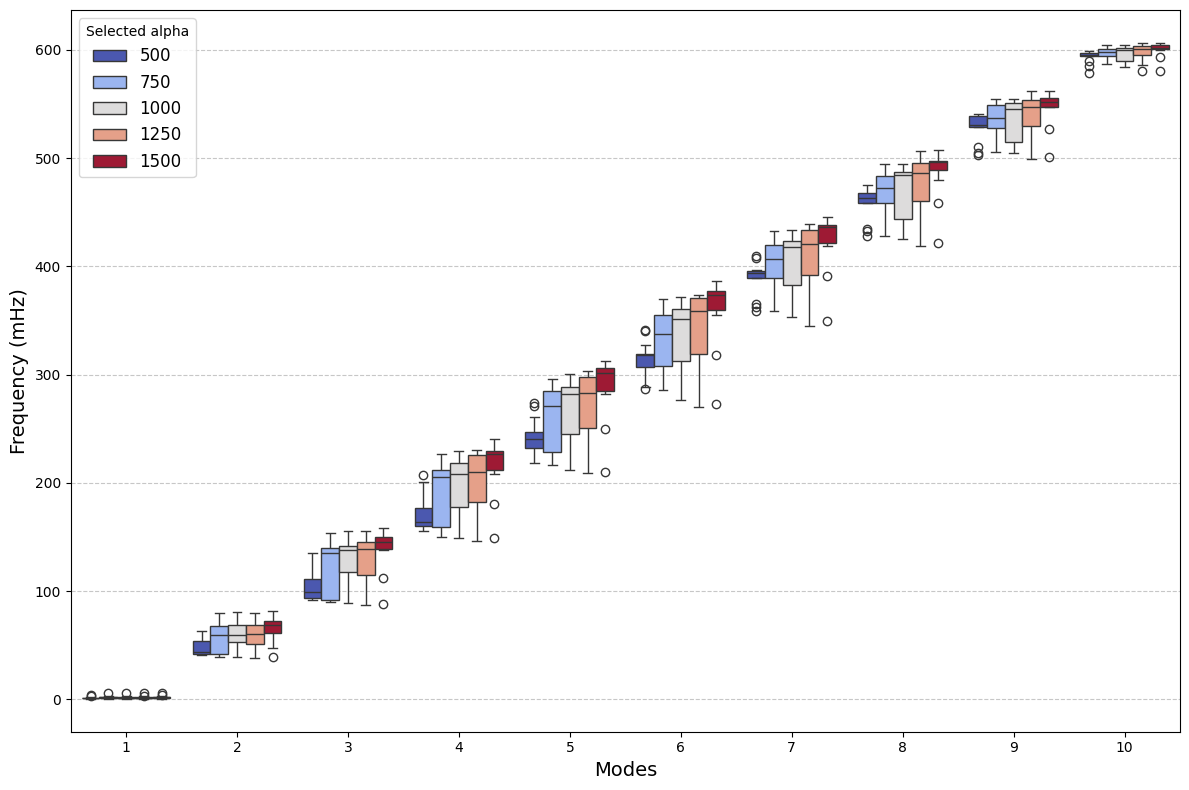

In [4]:
display_frequency(('alpha', alphas), './Results_0_mean/Results_run-0_800ms_', output_file = None, title_ = None, disp = None)

In [ ]:
display_energy(('K', Ks), 'Results_run-0_2000ms_', , disp=True)

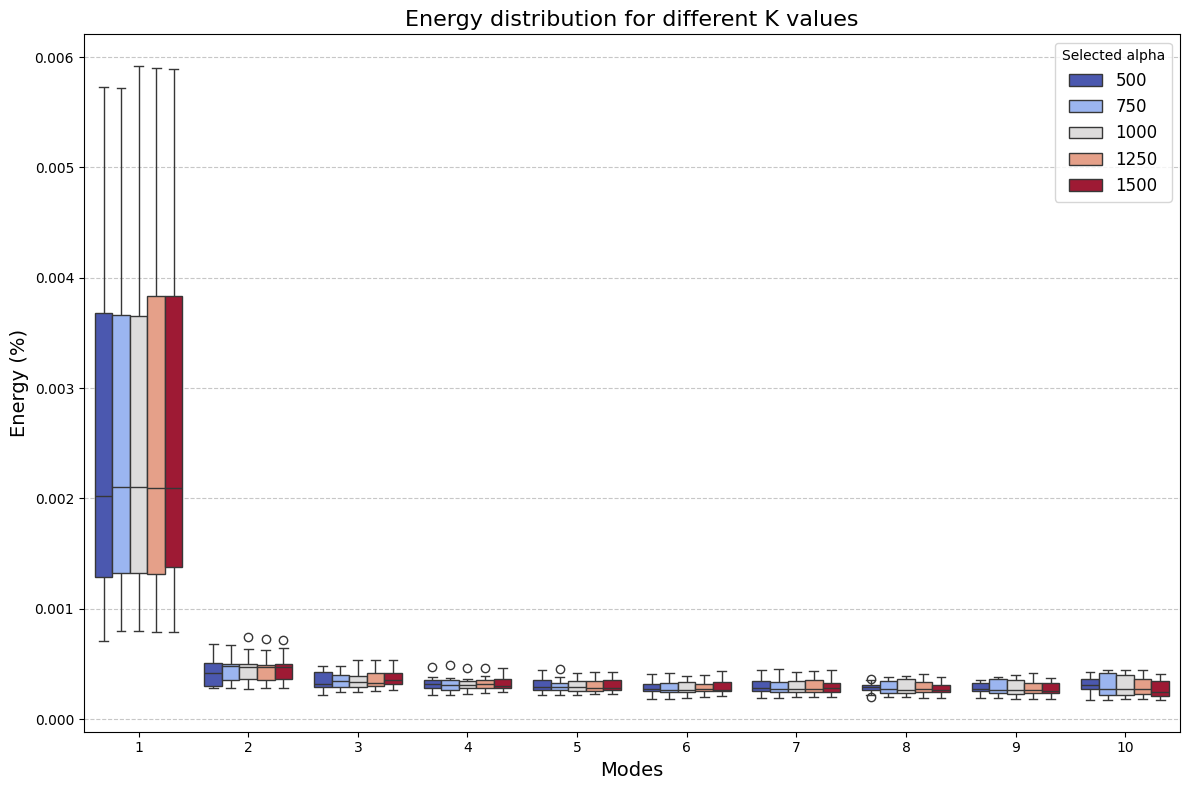

In [15]:
display_energy(('alpha', alphas), './Results_0_mean/Results_run-0_800ms_', title_ = 'Energy distribution for different K values', disp=True)

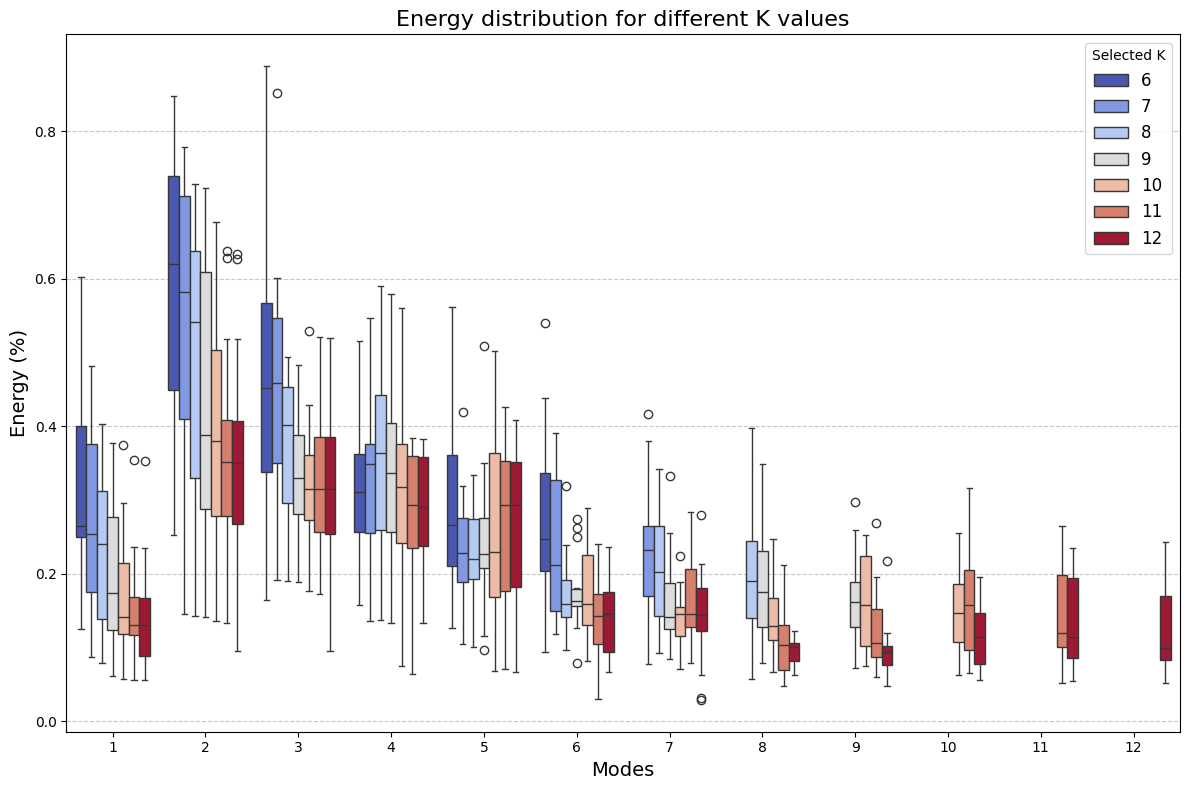

In [68]:
display_energy(('K', Ks), 'Results_run-0_2000ms_', output_file=f'./Figures/K_energy_comparison_{0}_{2000}', title_ = 'Energy distribution for different K values', disp=True)

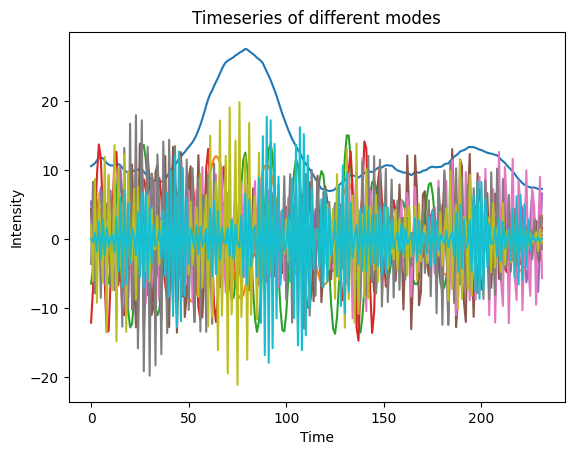

In [6]:
filpath = 'Results_0_mean/Results_run-0_800ms_/alpha_500/u_sub-57131_57.mat'
data = loadmat(filpath)
u = data['u'][:,2,:]
plt.plot(u.T)
plt.title('Timeseries of different modes')
plt.xlabel('Time')

plt.ylabel('Intensity')
plt.show()

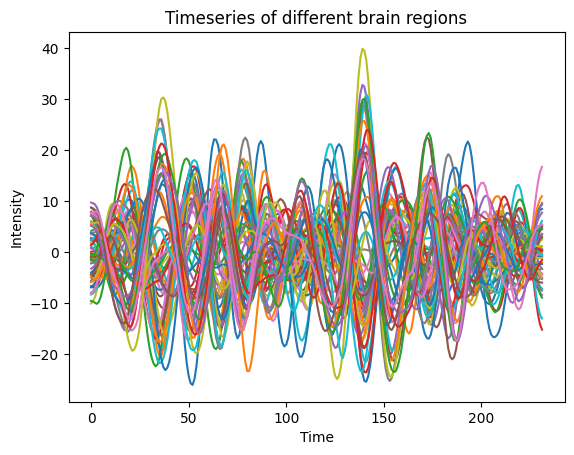

In [7]:
filpath = 'Results_0_mean/Results_run-0_800ms_/alpha_500/u_sub-57131_57.mat'
data = loadmat(filpath)
u = data['u'][1,:,:]
plt.plot(u.T)
plt.title('Timeseries of different brain regions')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

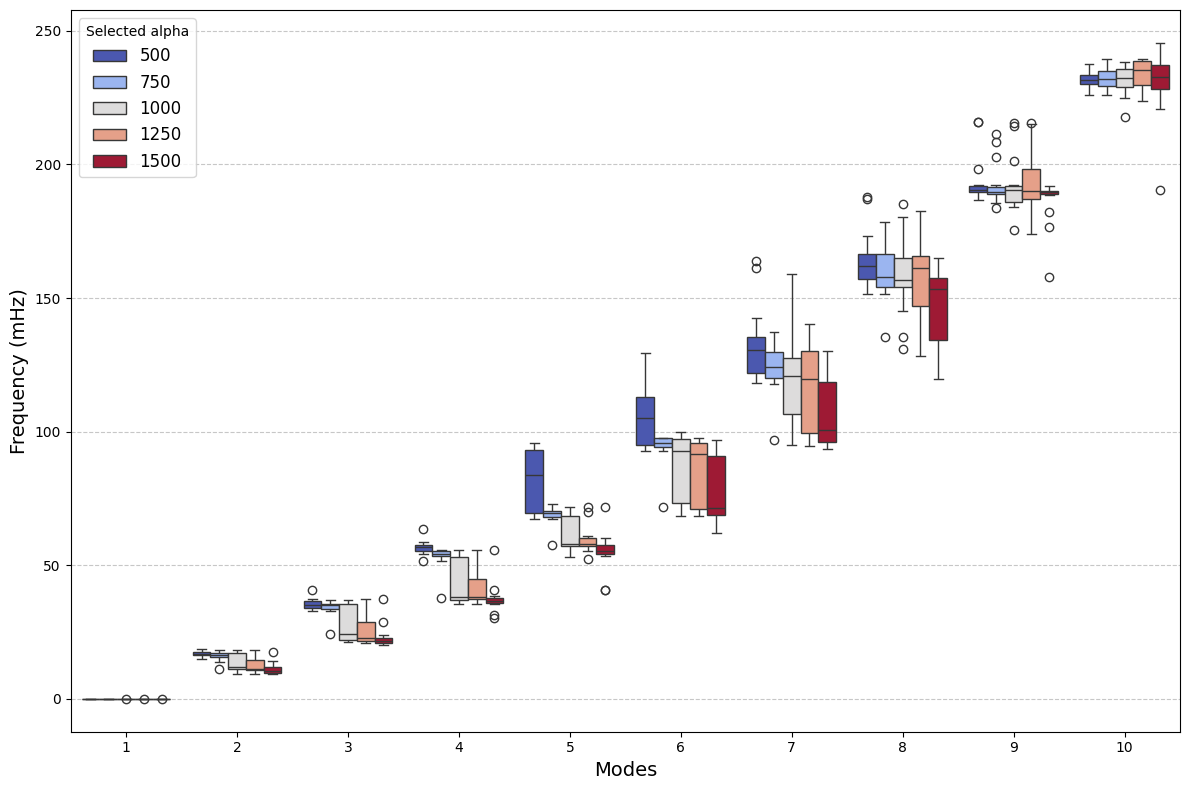

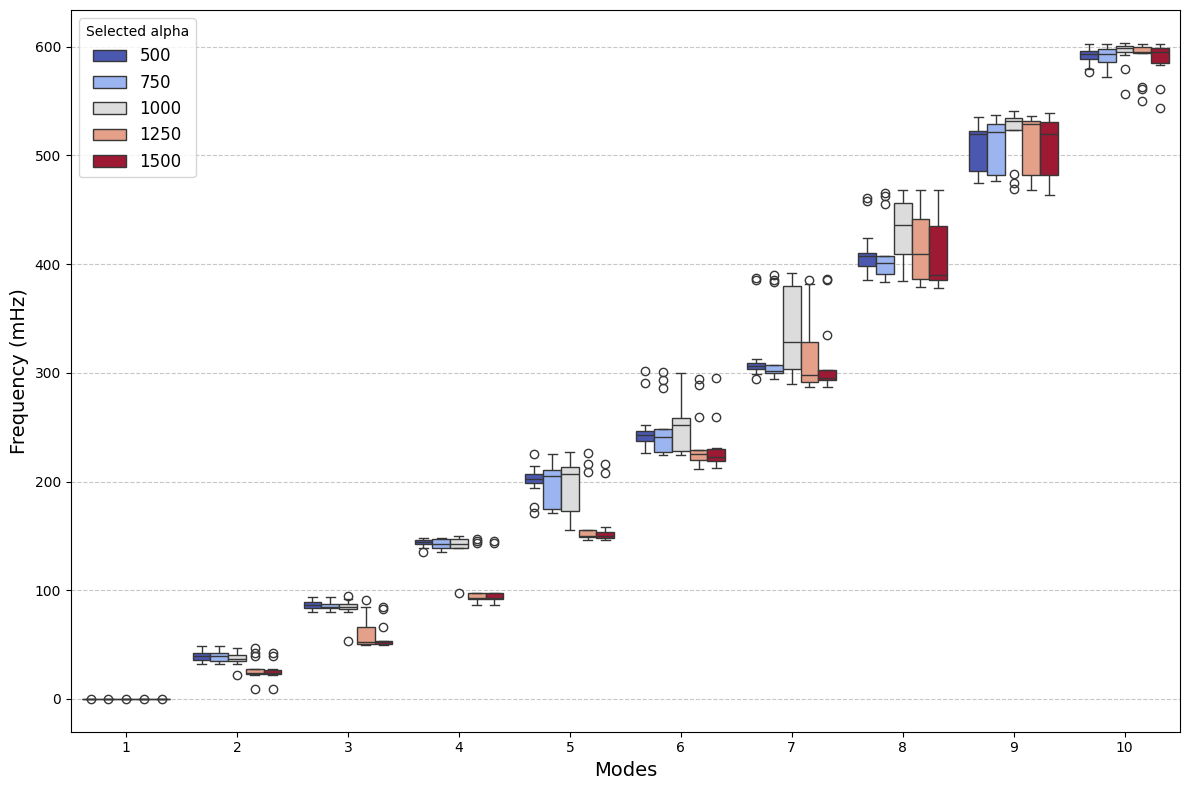

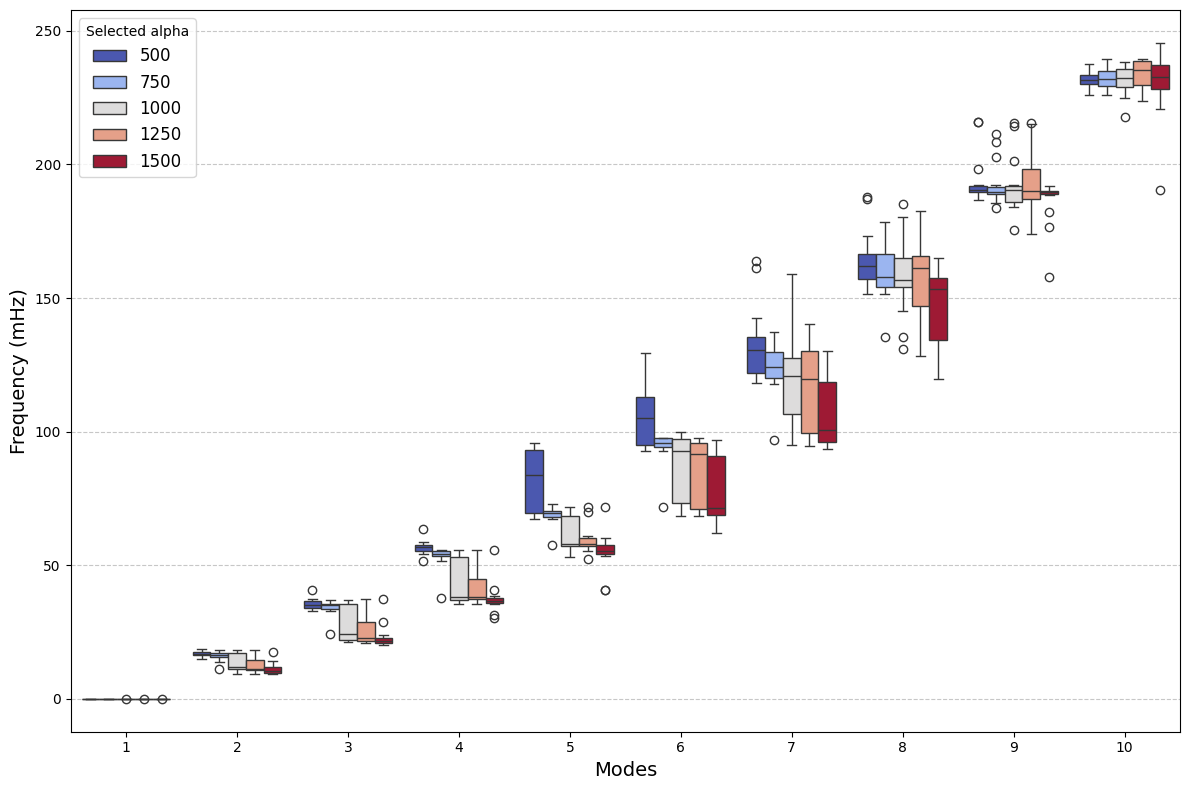

In [69]:
display_frequency(('alpha', alphas), base_folder = f'./Results_run-{0}_{800}ms_', output_file = f'./Figures/alpha_comparison_{0}_{800}', title_ = None)
display_frequency(('alpha', alphas), base_folder = f'./Results_run-{0}_{2000}ms_', output_file = f'./Figures/alpha_comparison_{0}_{2000}', title_ = None)


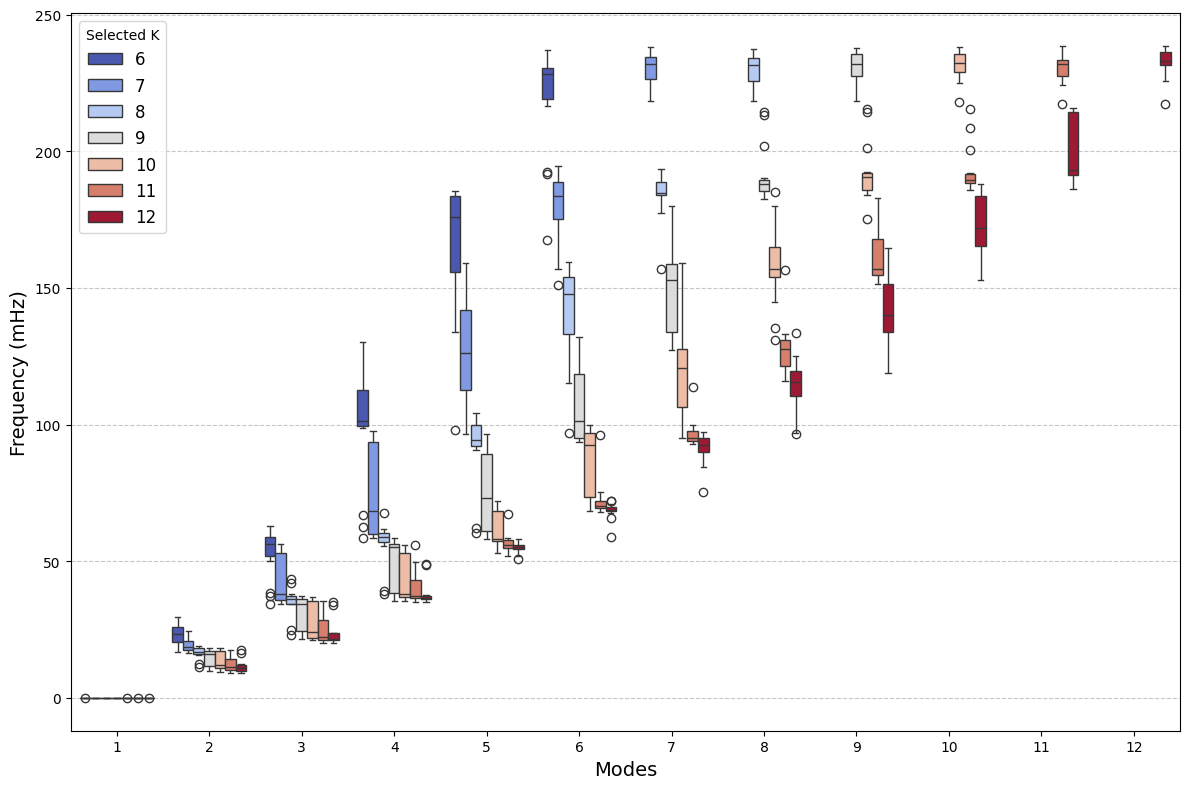

In [27]:
display_frequency(('K', Ks), base_folder = f'./Results_run-{0}_{2000}ms_', output_file = f'./Figures/K_comparison_{0}_{2000}', title_ = None)

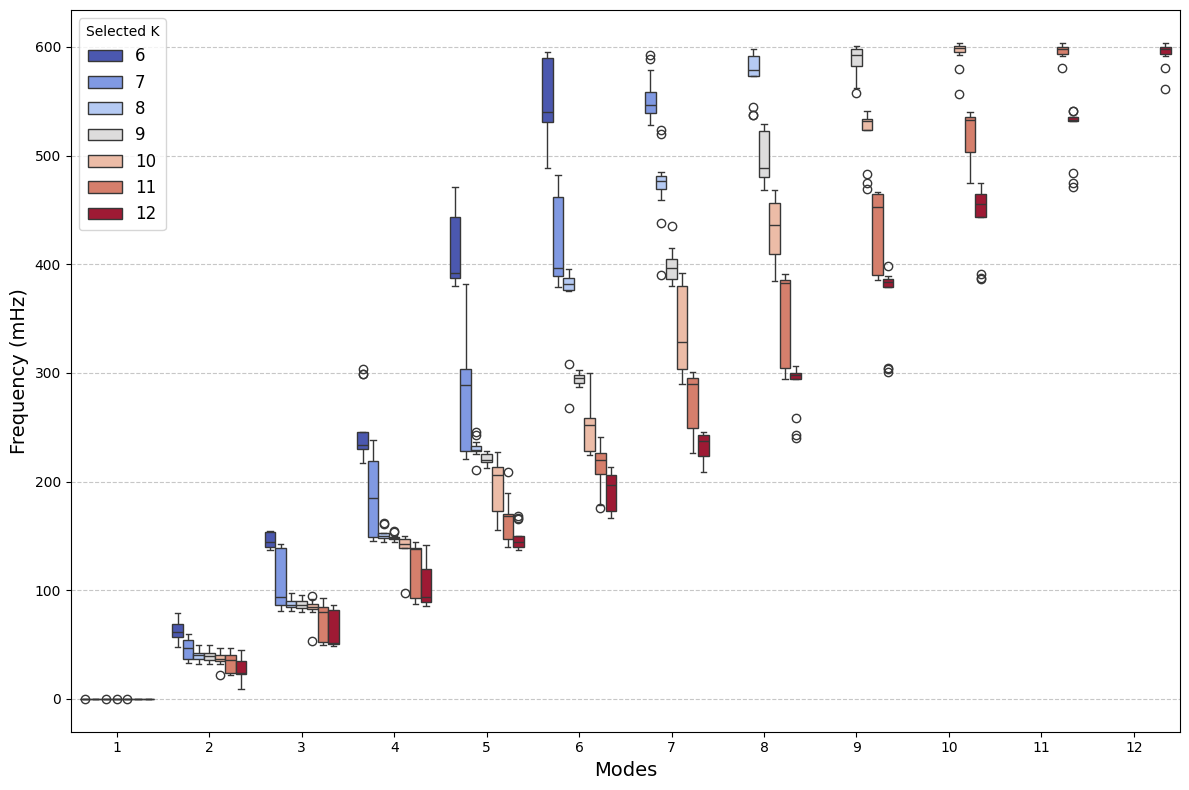

In [26]:
display_frequency(('K', Ks), base_folder = f'./Results_run-{0}_{800}ms_', output_file = f'./Figures/K_comparison_{0}_{800}', title_ = None)

In [12]:
mat1 =  loadmat('/users/konstantinosvosinas/Desktop/PREP2025/Results_run-0_800ms_/K_6/omega_sub-53888_300.mat')['omega']
mat1[-1]*1000

array([1.85111678e-02, 6.17250148e+01, 1.39176512e+02, 2.47033096e+02,
       4.39324124e+02, 5.92396427e+02])

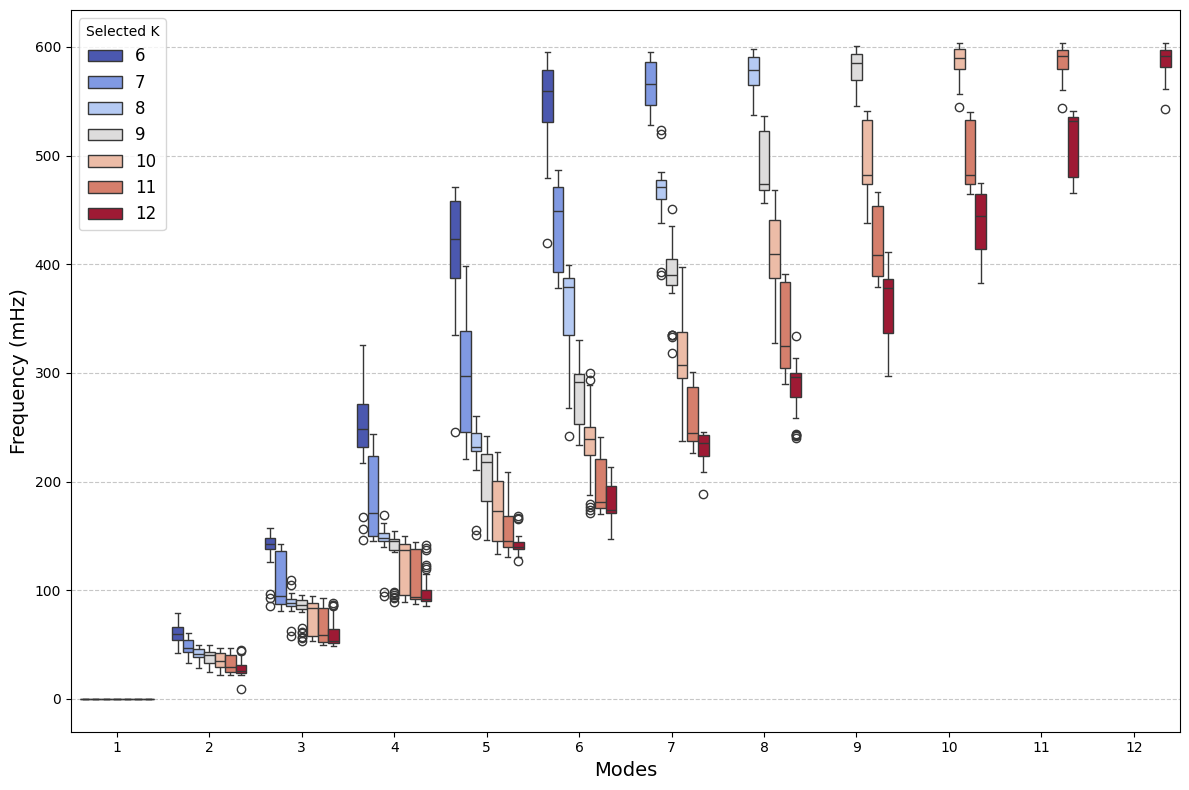

In [4]:
display_frequency(('K', Ks), base_folder = f'./Results_run-{0}_{800}ms_', output_file = f'./Figures/K_comparison_{0}_{800}', title_ = None)


  0%|          | 0/3 [00:03<?, ?it/s]


ValueError: Could not interpret value `Mode` for `x`. An entry with this name does not appear in `data`.

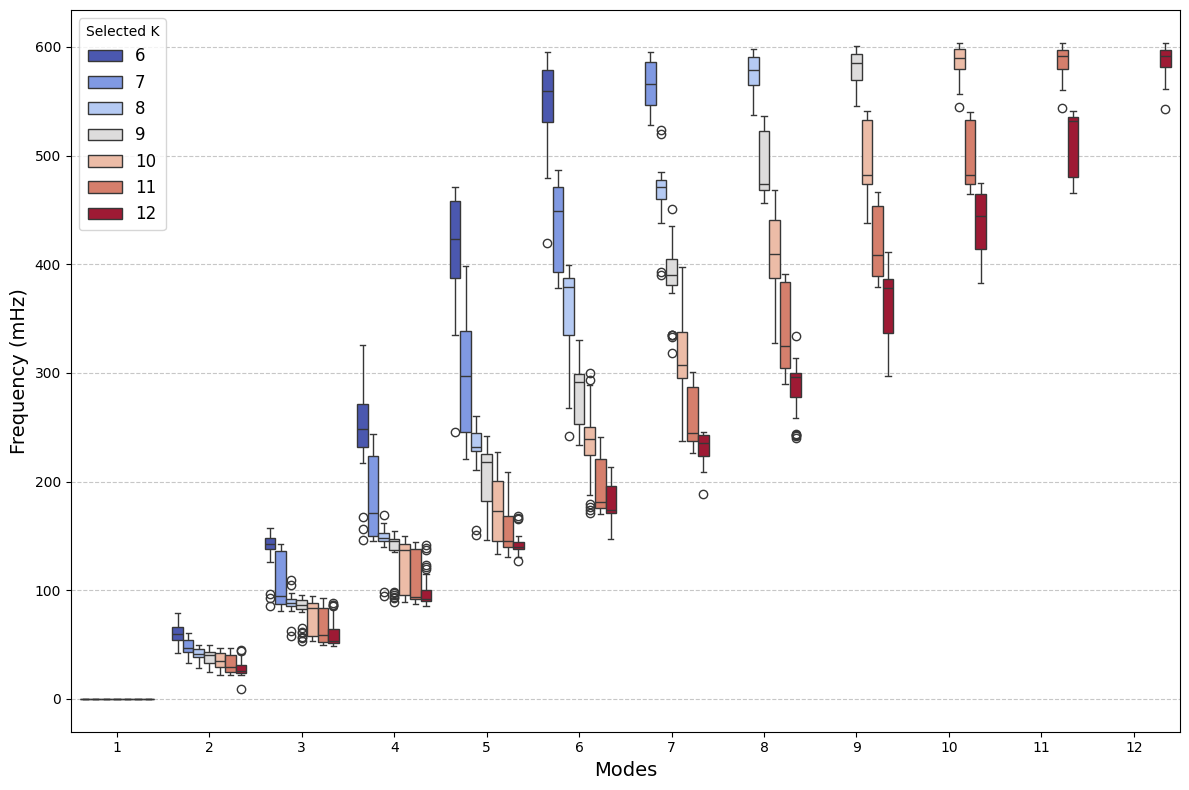

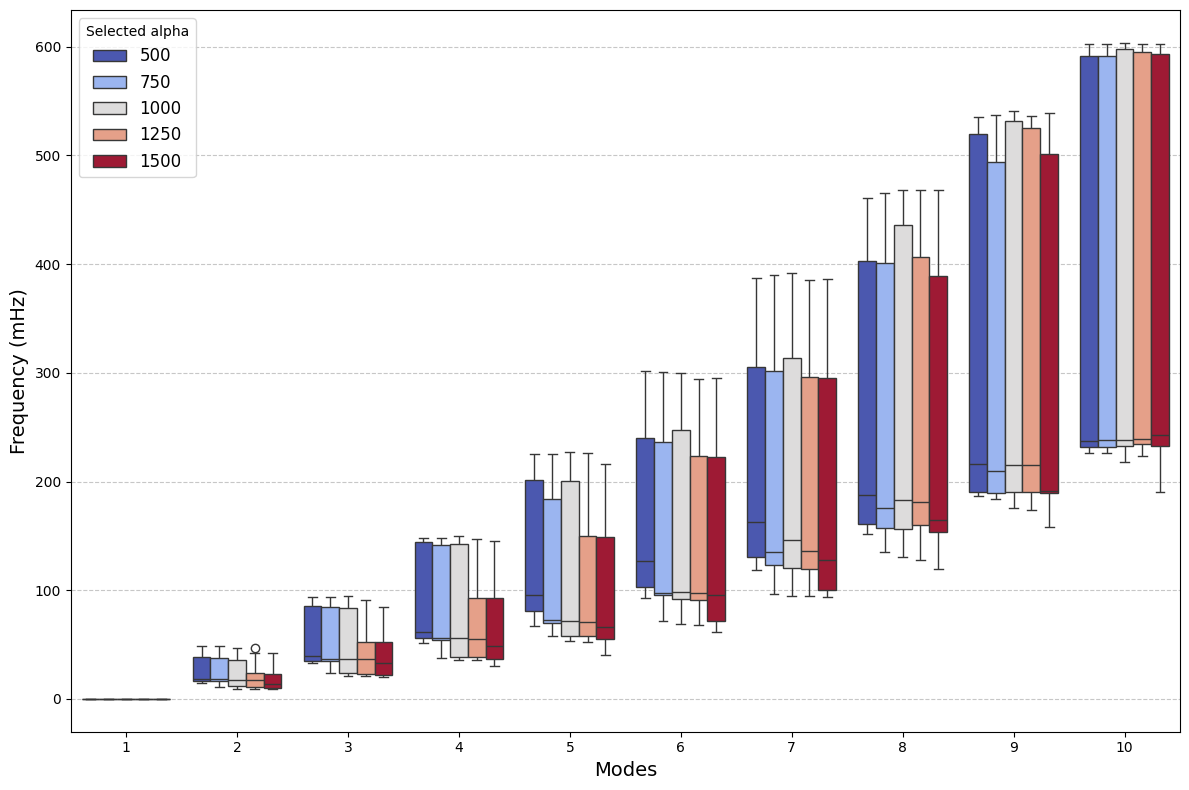

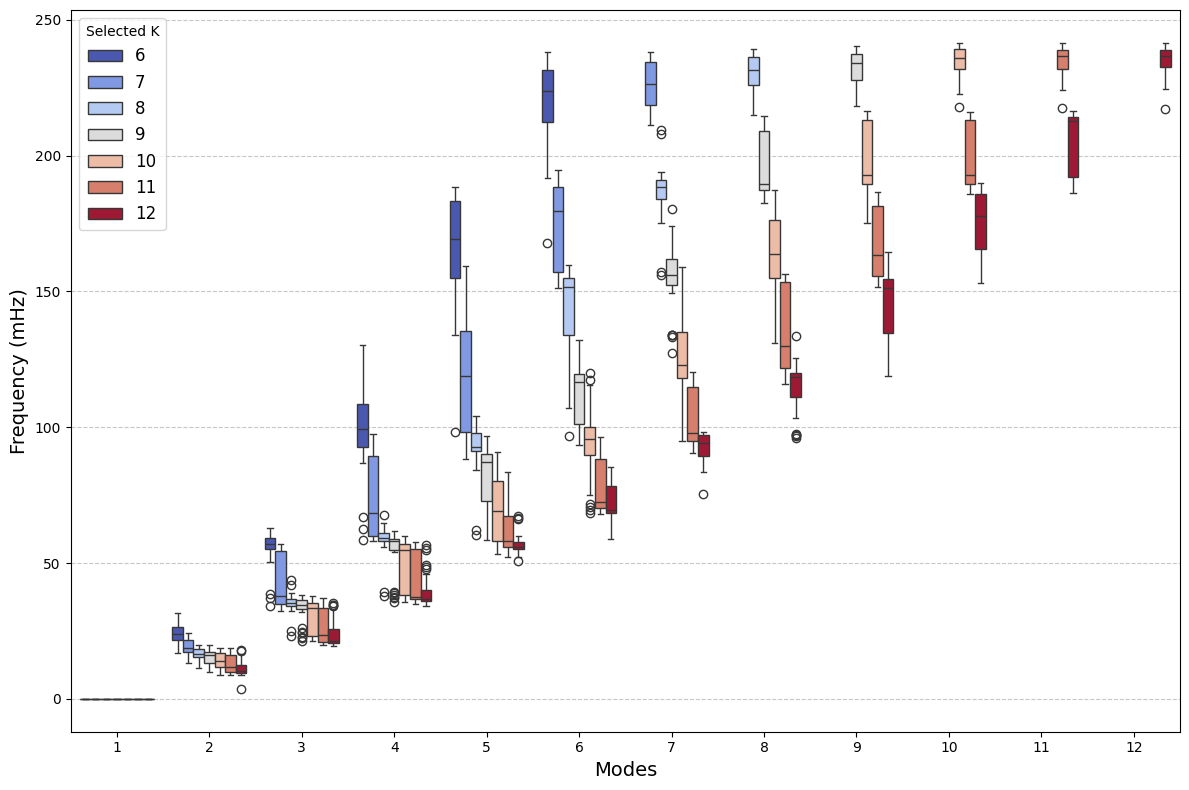

<Figure size 1200x800 with 0 Axes>

In [9]:
for run in tqdm(range(3)):
    for sr in [800, 2000]:
        display_frequency(('K', Ks), base_folder = f'./Results_run-{run}_{sr}ms_', output_file = f'./Figures/K_comparison_{run}_{sr}', title_ = None)
        display_frequency(('alpha', alphas), base_folder = f'./Results_run-{run}_{sr}ms_', output_file = f'./Figures/alpha_comparison_{run}_{sr}', title_ = None)


In [8]:
folder_name = f"/users/konstantinosvosinas/Desktop/PREP2025/Results_run-0_800ms_/K_6/sub-53888.mat"
data_mat = loadmat(folder_name)
omega = data_mat['omega']  # Extract omega